In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df=pd.read_csv('E:\\working_DATA\\carprice_pred.csv')

In [3]:
df.sample(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9895.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
81,82,3,mitsubishi g4,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0


# Checking Missing Values

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Checking duplicates

In [5]:
df.duplicated().sum()

0

In [6]:
X=df[['enginesize','horsepower','peakrpm','wheelbase',]]
y=df['price']

In [7]:
X

,enginesize,horsepower,peakrpm,wheelbase
0,130,111,5000,88.6
1,130,111,5000,88.6
2,152,154,5000,94.5
3,109,102,5500,99.8
4,136,115,5500,99.4
...,...,...,...,...
200,141,114,5400,109.1
201,141,160,5300,109.1
202,173,134,5500,109.1
203,145,106,4800,109.1


# train test split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# QQ ploting for checking the distribution

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


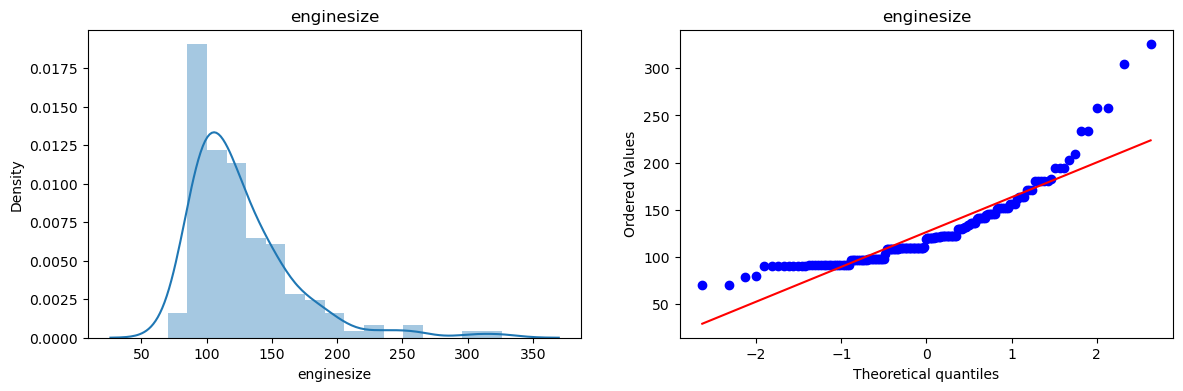

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


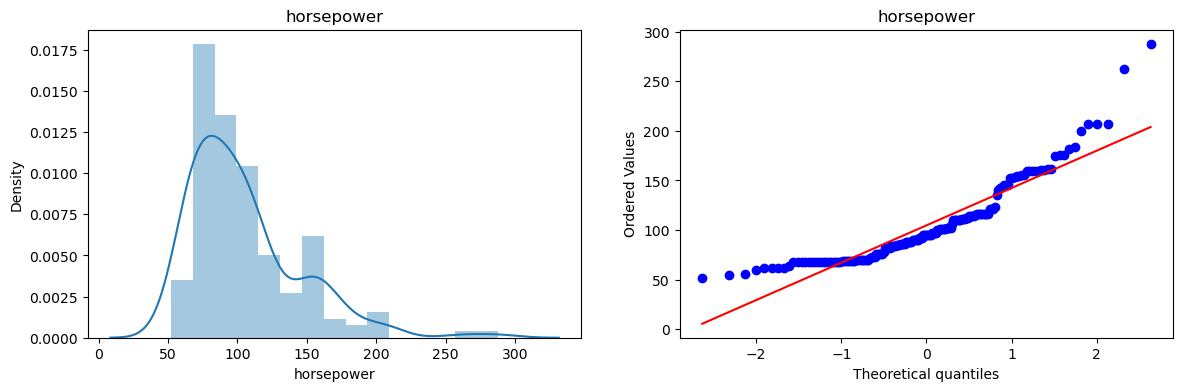

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


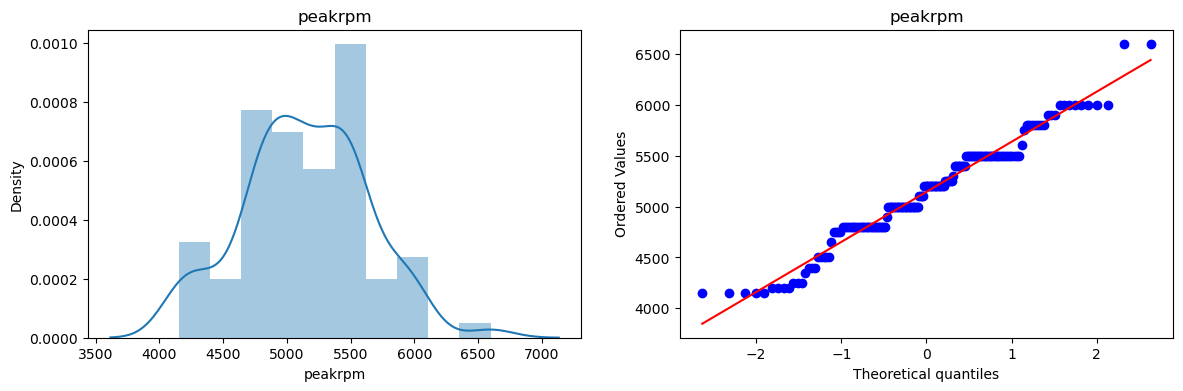

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


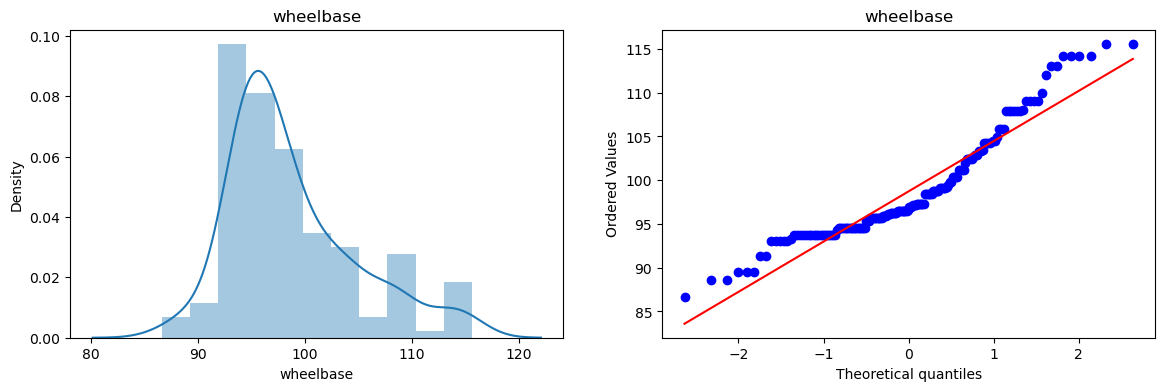

In [10]:
import scipy.stats as stats
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)

    plt.show()

# Function Transformer using Column Transformer

In [12]:
from sklearn.preprocessing import PowerTransformer,FunctionTransformer

In [33]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer(transformers=[
    ('log',FunctionTransformer(np.log1p),[0,1]),
    ('resiprocal',FunctionTransformer(lambda x:1/x**1/2),[2])
    
],remainder='passthrough')
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

# Converting Transformed X_train,X_test in DataFrame

In [34]:
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

# Checking Function Transformer using QQ plot

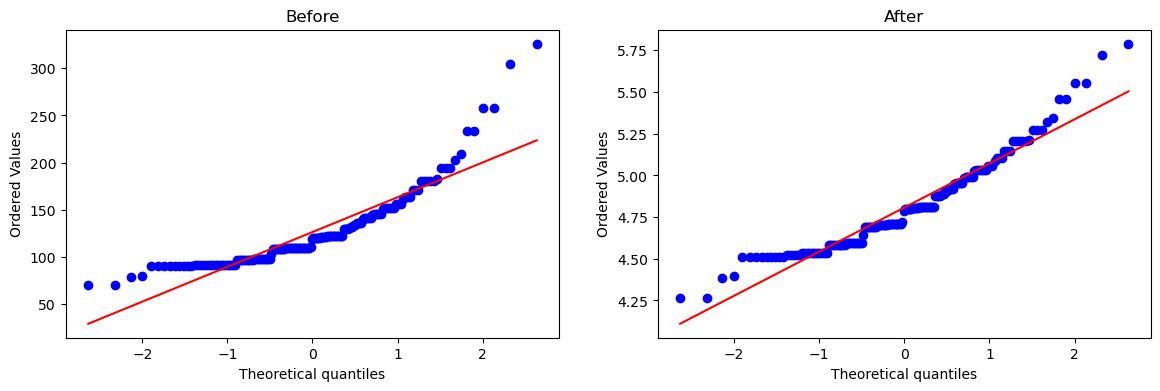

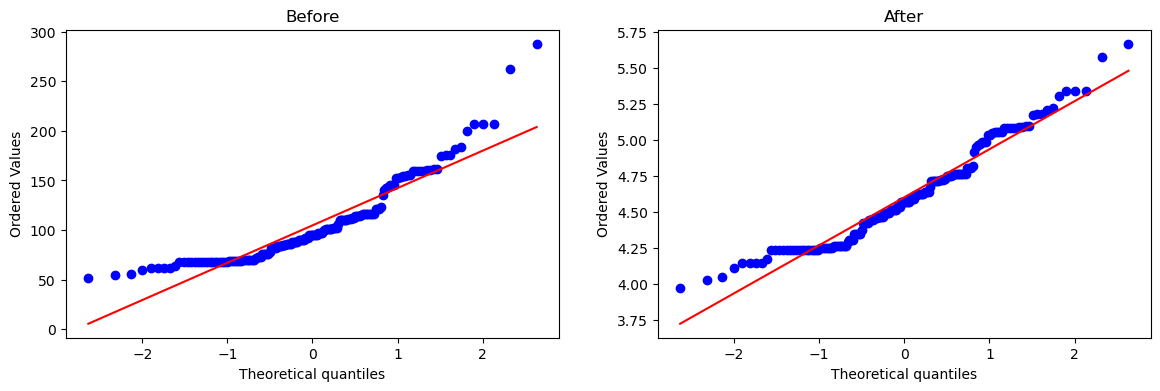

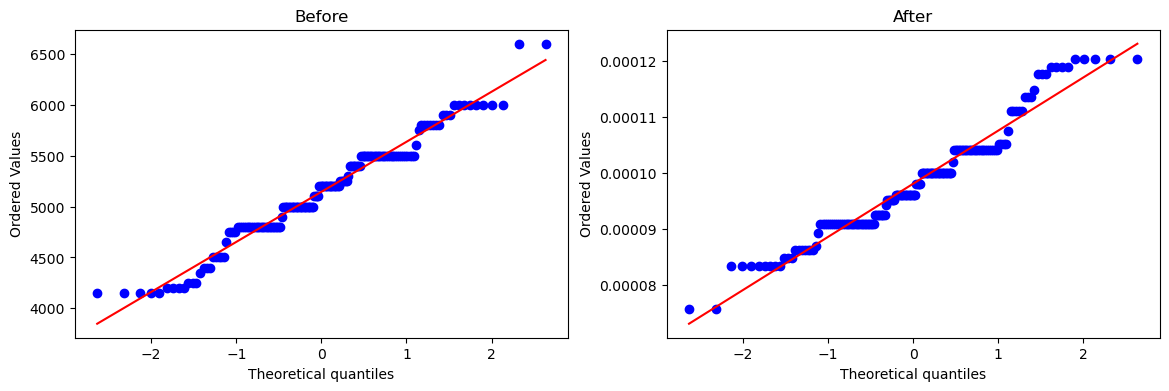

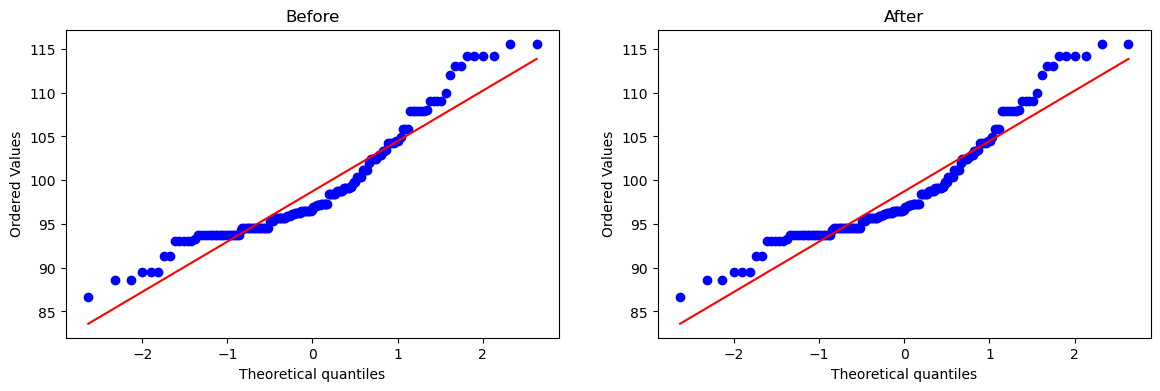

In [35]:
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train[col],dist='norm',plot=plt)
    plt.title("Before")

    plt.subplot(122)
    stats.probplot(X_train_transformed[col],dist='norm',plot=plt)
    plt.title('After')

    plt.show()